In [1]:
!pip install tensorflow numpy pandas

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


---

# Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plotting a sample

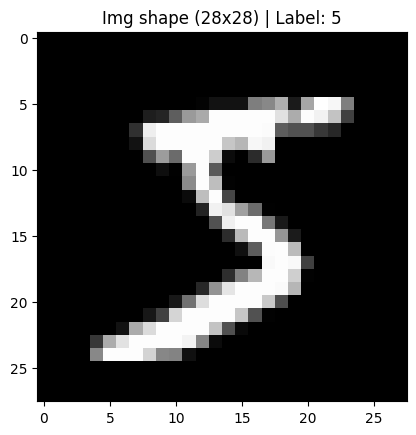

In [5]:
sample_idx = 0

plt.imshow(x_train[sample_idx], cmap='gray')
plt.title(f'Img shape ({x_train[sample_idx].shape[0]}x{x_train[sample_idx].shape[1]}) | Label: {y_train[sample_idx]}')
plt.show()

## One-hot Encoding the labels

In [6]:
y_train_oh = keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=10)

## Flattening images

In [7]:
fltn = Flatten()

x_train = fltn(x_train)
x_test  = fltn(x_test)

## Normalizing input

In [ ]:
x_train = x_train/255
x_test = x_test/255

---

# Neural Network

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=len(x_train[0])))
model.add(Dense(10, activation='softmax', input_dim=512))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.CategoricalAccuracy(name='Accuracy'),
        keras.metrics.Precision(name='Precision'),
        keras.metrics.Recall(name='Recall'),
        keras.metrics.F1Score(name='F1', average='micro'),
    ]
)

model.summary()

c:\Users\12ped\anaconda3\envs\MLENG\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    x=x_train,
    y=y_train_oh,
    batch_size=50,
    epochs=100,
    shuffle=True,
    validation_data=(x_test, y_test_oh)
)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8678 - F1: 0.8678 - Precision: 0.8680 - Recall: 0.8677 - loss: 8.1970 - val_Accuracy: 0.9338 - val_F1: 0.9338 - val_Precision: 0.9366 - val_Recall: 0.9299 - val_loss: 0.4862
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9454 - F1: 0.9454 - Precision: 0.9484 - Recall: 0.9422 - loss: 0.3593 - val_Accuracy: 0.9429 - val_F1: 0.9429 - val_Precision: 0.9469 - val_Recall: 0.9409 - val_loss: 0.3224
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9548 - F1: 0.9548 - Precision: 0.9592 - Recall: 0.9522 - loss: 0.2236 - val_Accuracy: 0.9406 - val_F1: 0.9406 - val_Precision: 0.9444 - val_Recall: 0.9383 - val_loss: 0.4213
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Accuracy: 0.9574 - F1: 0.9574 - Precision: 0.9621 - Recall: 0.9544 - loss: 0.2161 - val_Accuracy: 0.9434 - val_F1: 0.9434 - val_Precision: 0.9495 - val_Recall: 0.9344 - val_loss: 0.3781
Epoch 5/100
1200/1200 ━━━━━━

In [43]:
h_df = pd.DataFrame(history.history)

h_df

,Accuracy,F1,Precision,Recall,loss,val_Accuracy,val_F1,val_Precision,val_Recall,val_loss
0,0.910550,0.910550,0.911425,0.910133,2.919218,0.9338,0.9338,0.936644,0.9299,0.486213
1,0.945650,0.945650,0.948955,0.942850,0.348936,0.9429,0.9429,0.946865,0.9409,0.322420
2,0.952367,0.952367,0.956304,0.950183,0.259261,0.9406,0.9406,0.944439,0.9383,0.421307
3,0.954967,0.954967,0.959773,0.951983,0.236403,0.9434,0.9434,0.949497,0.9344,0.378078
4,0.956883,0.956883,0.962036,0.953650,0.229094,0.9526,0.9526,0.958582,0.9489,0.290180
...,...,...,...,...,...,...,...,...,...,...
95,0.991317,0.991317,0.996320,0.988100,0.071186,0.9706,0.9706,0.974488,0.9664,1.983977
96,0.991583,0.991583,0.997206,0.987400,0.054140,0.9690,0.9690,0.973793,0.9661,1.998300
97,0.990650,0.990650,0.996013,0.986650,0.084287,0.9689,0.9689,0.973316,0.9666,2.028355
98,0.989850,0.989850,0.995976,0.985983,0.093388,0.9695,0.9695,0.974662,0.9655,1.989369


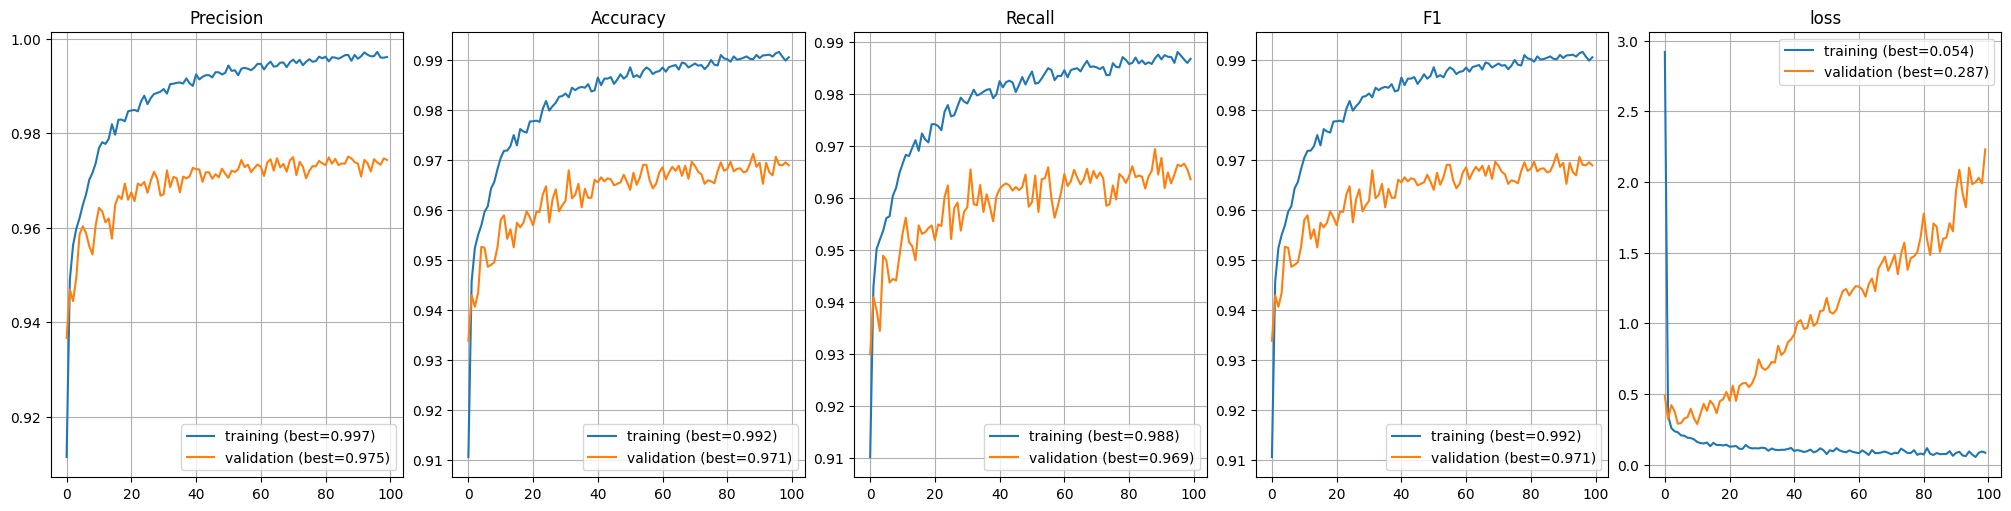

In [48]:
metrics = set([k.split('_')[-1] for k in history.history.keys()])

fig, axs = plt.subplots(ncols=len(metrics), nrows=1, constrained_layout=True, figsize=(20,5))

for plot_idx, metric in enumerate(metrics):
    best = h_df.max(0) if metric != 'loss' else h_df.min(0)
    axs[plot_idx].plot(
        history.history[metric],
        label=f'training (best={best[metric]:.3f})'
    )
    axs[plot_idx].plot(
        history.history['val_'+metric],
        label=f'validation (best={best["val_"+metric]:.3f})'
    )
    axs[plot_idx].grid(True)
    axs[plot_idx].set_title(metric)
    axs[plot_idx].legend()
